# Exploratory Data Analysis  
  
First, we want to check if the dataset provided by Reply is consistent with the ones used in the Tobacco3482 dataset

In [52]:
import os
from PIL import Image, ImageStat, ImageFilter
import numpy as np

In [ ]:
def are_images_equal(img1, img2):
    # Compare images to check if they are equal
    return np.array_equal(np.array(img1), np.array(img2))

def find_matching_files(folder_a, folder_b):
    # Find .tif images in folder_a that have a corresponding .jpg image in folder_b
    matches = []
    tif_files = [f for f in os.listdir(folder_a) if f.endswith('.tif')]
    jpg_files = [f for f in os.listdir(folder_b) if f.endswith('.jpg')]
    
    for tif_file in tif_files:
        tif_path = os.path.join(folder_a, tif_file)
        tif_image = Image.open(tif_path).convert('RGB')
        
        for jpg_file in jpg_files:
            jpg_path = os.path.join(folder_b, jpg_file)
            jpg_image = Image.open(jpg_path).convert('RGB')
            
            if are_images_equal(tif_image, jpg_image):
                matches.append((tif_file, jpg_file))
                break  
    
    return matches

In [ ]:
# Advertising
matches = find_matching_files('/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Reply_dataset', '/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Tobacco3482-10/ADVE')
print(f"There are {len(matches)} Advertising matching pairs: {matches}")

In [ ]:
# Email
matches = find_matching_files('/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Reply_dataset', '/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Tobacco3482-10/Email')
print(f"There are {len(matches)} Email matching pairs: {matches}")

In [ ]:
# Forms
matches = find_matching_files('/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Reply_dataset', '/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Tobacco3482-10/Form')
print(f"There are {len(matches)} Forms matching pairs: {matches}")

In [ ]:
# Handwritten documents
matches = find_matching_files('/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Reply_dataset', '/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Tobacco3482-10/Handwritten documents')
print(f"There are {len(matches)} Handwritten documents matching pairs: {matches}")

In [ ]:
# Letter
matches = find_matching_files('/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Reply_dataset', '/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Tobacco3482-10/Letter')
print(f"There are {len(matches)} Letter matching pairs: {matches}")

In [ ]:
# Memo
matches = find_matching_files('/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Reply_dataset', '/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Tobacco3482-10/Memo')
print(f"There are {len(matches)} Memo matching pairs: {matches}")

In [ ]:
# News
matches = find_matching_files('/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Reply_dataset', '/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Tobacco3482-10/News')
print(f"There are {len(matches)} News matching pairs: {matches}")

In [ ]:
# Report
matches = find_matching_files('/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Reply_dataset', '/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Tobacco3482-10/Report')
print(f"There are {len(matches)} Report matching pairs: {matches}")

In [ ]:
# Resume
matches = find_matching_files('/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Reply_dataset', '/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Tobacco3482-5/Resume')
print(f"There are {len(matches)} Resume matching pairs: {matches}")

In [ ]:
# Scientific
matches = find_matching_files('/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Reply_dataset', '/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Tobacco3482-5/Scientific')
print(f"There are {len(matches)} Scientific matching pairs: {matches}")

When comparing the images from the Tobacco 3482 dataset with those from the dataset provided by Reply, a significant number of matches did not emerge. Therefore, we decided to adopt a specific methodological approach. First, the images from the Reply dataset will be classified according to the categories established by the Tobacco dataset, namely 'ADVE', 'Email', 'Form', 'Handwritten documents', 'Letter', 'Memo', 'News', 'Report', 'Resume', and 'Scientific'. Subsequently, the Tobacco dataset will be used for training and validation of our machine learning models. Finally, the Reply dataset will be used exclusively as a test set, allowing us to compare the model's predictions with the classes actually specified through the preliminary classification.  
## Image Exploration

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import skew, kurtosis

In [73]:
# Load the data
def get_file_paths_and_labels(path_of_directory):
    image_paths = []
    labels = []
    label_to_index = {}
    current_label = 0

    categories = ['ADVE', 'Email', 'Form', 'Handwritten documents', 'Letter', 'Memo', 'News', 'Report', 'Resume', 'Scientific']
    for category in categories:
        class_dir = os.path.join(path_of_directory, category)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
                image_paths.append(img_path)
                if category not in label_to_index:
                    label_to_index[category] = current_label
                    current_label += 1
                labels.append(label_to_index[category])
                    
    return image_paths, labels, label_to_index


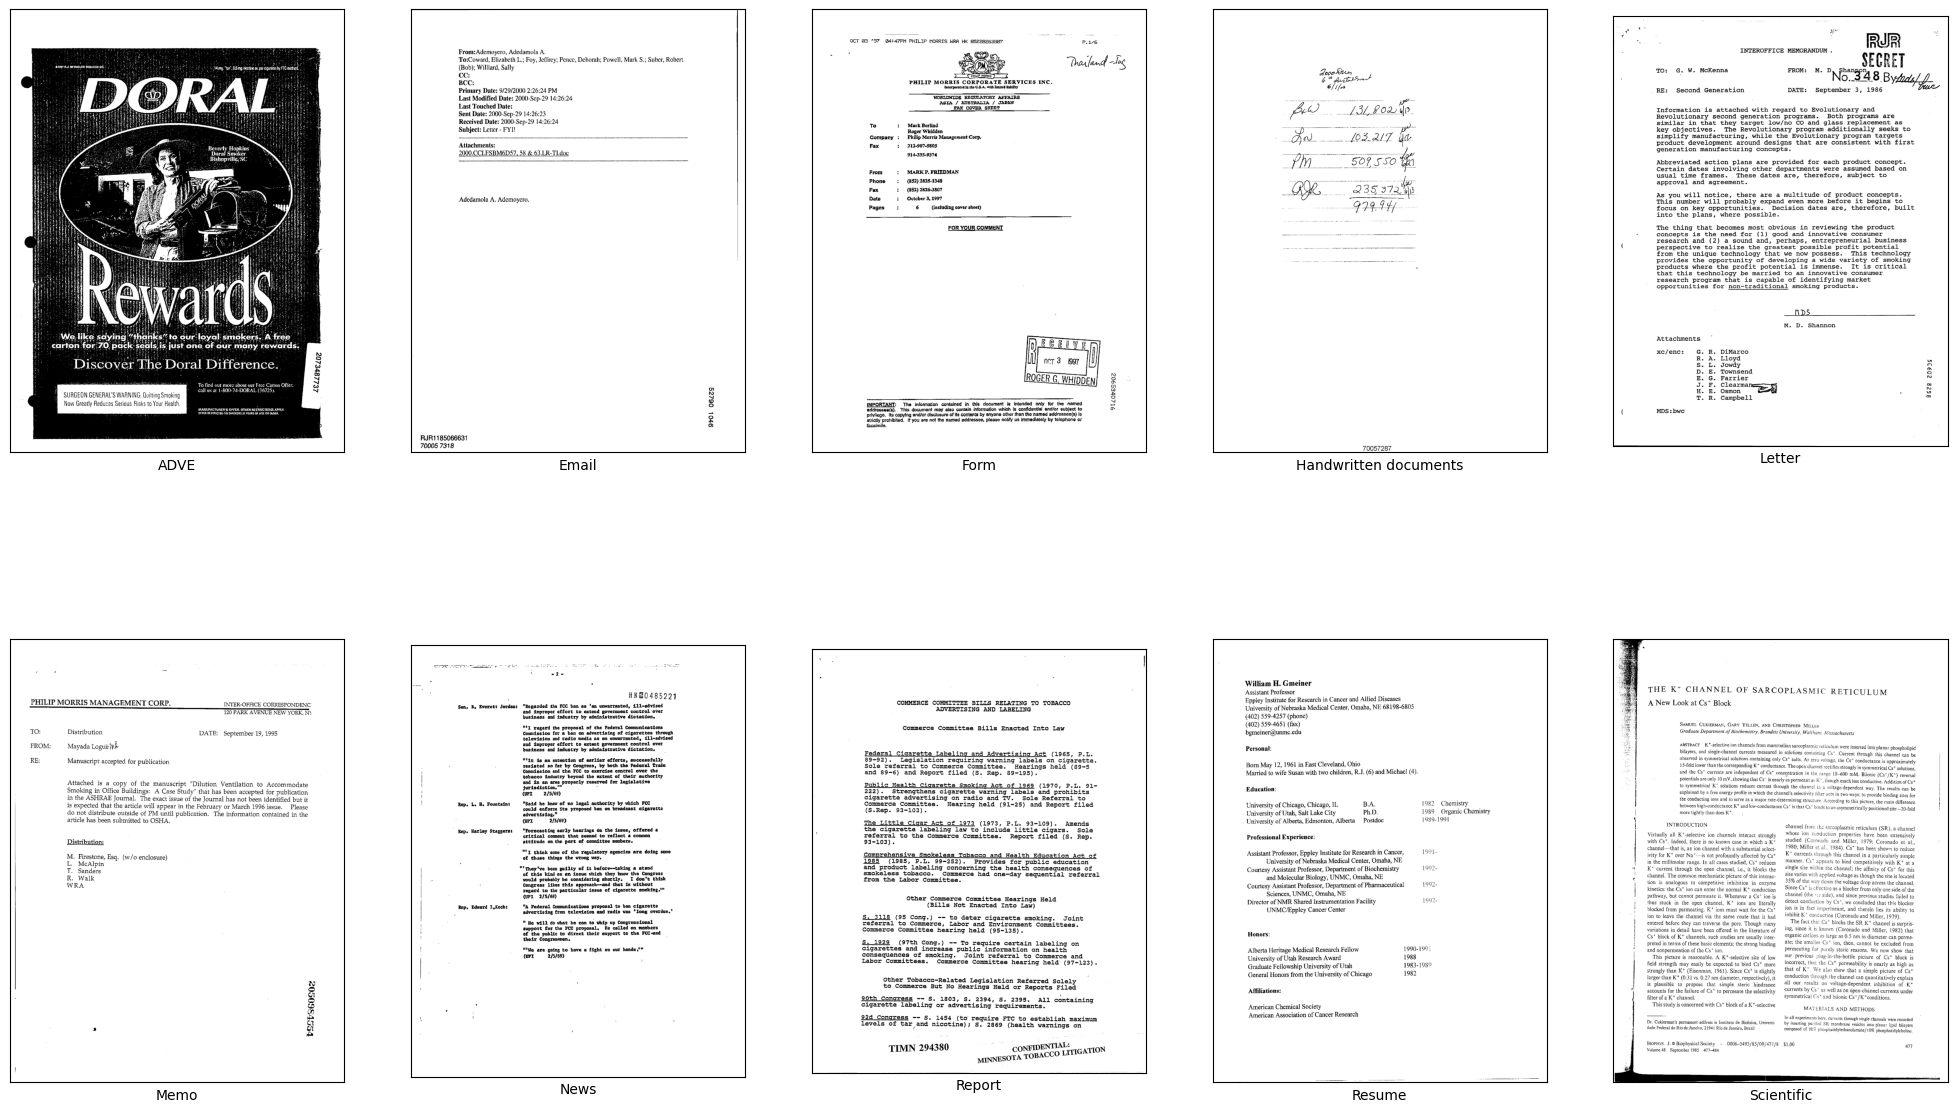

In [74]:
# Display of the images
image_dir='/Users/simone/Desktop/Luiss /*Machine Learning/Reply project/Document-classification/Tobacco3482-10'

image_paths, labels, label_to_index = get_file_paths_and_labels(image_dir)

plt.figure(figsize=(25, 15))
for i, (label_name, label_int) in enumerate(label_to_index.items()):
    sample_idx = labels.index(label_int)
    image_path = image_paths[sample_idx]
    img = Image.open(image_path).convert('L') 
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap='gray')
    plt.xlabel(label_name)
plt.show()

In [78]:
shapes=[]
for img in image_paths:
    s = np.array(Image.open(img)).shape
    if s not in shapes:
        shapes.append(s)

print(shapes)

[(2292, 1728), (1575, 1200), (3296, 2560), (1620, 2386), (3189, 2560), (3464, 2544), (3241, 2544), (3373, 2550), (3293, 2544), (3263, 2544), (3346, 2560), (3150, 2400), (3230, 2544), (3266, 2544), (1089, 817), (3169, 2560), (3421, 2496), (3303, 2544), (3177, 2560), (3142, 2560), (3257, 2544), (3317, 2560), (3461, 3296), (3299, 2560), (3272, 2544), (3239, 2496), (3294, 2560), (3460, 2496), (3043, 2560), (3244, 2544), (3300, 2544), (3448, 2496), (2156, 1728), (3249, 2544), (3261, 2544), (4192, 2560), (3158, 2560), (3155, 2560), (3488, 2592), (3280, 2544), (3250, 2544), (3226, 2544), (2100, 1600), (3258, 2544), (3200, 2544), (3364, 2560), (3301, 2560), (3392, 2544), (3157, 2560), (3262, 2560), (3279, 2560), (3341, 2560), (3334, 2560), (3414, 3296), (3236, 2544), (3340, 2560), (3245, 2544), (3249, 2560), (3132, 2560), (3256, 2544), (3344, 2560), (3484, 2496), (3381, 2624), (3259, 2544), (3246, 2544), (3269, 2544), (3248, 2544), (3429, 2544), (3297, 2560), (3253, 2560), (3300, 2550), (3146,

There are many different shapes of the images in the dataset. Resizing the images will improve the performance of the model.

In [79]:
# Check of images format
def get_image_formats(image_paths):
    formats = [os.path.splitext(path)[1] for path in image_paths]
    return Counter(formats)

formats = get_image_formats(image_paths)
print("Format counts:", formats)

Format counts: Counter({'.jpg': 3482})


Conversely to the Reply dataset, the images of the Tobacco 3482 dataset are in jpg format.

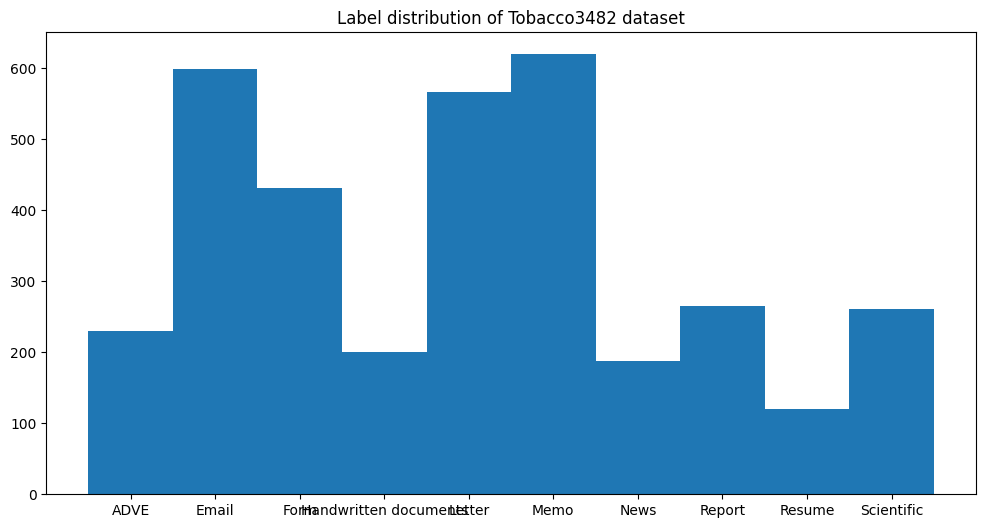

In [80]:
plt.figure(figsize=(12, 6))
plt.hist(labels, bins=range(len(label_to_index)+1))
ax = plt.gca()
ax.set_title('Label distribution of Tobacco3482 dataset')
ax.set_xticks([i + 0.5 for i in range(len(label_to_index))])
xticklabels = ax.set_xticklabels(list(label_to_index.keys()))

In [81]:
def analyze_image_properties(image_paths):
    properties = []
    for path in image_paths:
        with Image.open(path) as img:
            img_gray = img.convert('L')
            img_stat = ImageStat.Stat(img_gray)
            np_img = np.array(img_gray)
            np_img_flat = np_img.flatten()
            
            # Calculate edge intensity
            img_edges = img.filter(ImageFilter.FIND_EDGES)
            np_edges = np.array(img_edges)
            edge_intensity = np.mean(np_edges)

            # Calculate skewness and kurtosis
            img_skewness = skew(np_img_flat)
            img_kurtosis = kurtosis(np_img_flat)
            
            # Calculate hue and saturation
            img_hsv = img.convert('HSV')
            np_hsv = np.array(img_hsv)
            hue = np.mean(np_hsv[:, :, 0])
            saturation = np.mean(np_hsv[:, :, 1])
            
            properties.append({
                'path': path,
                'mean_brightness': img_stat.mean[0],
                'rms_brightness': img_stat.rms[0],
                'contrast': img_stat.stddev[0],
                'luminosity': img_stat.sum[0],
                'skewness': img_skewness,
                'kurtosis': img_kurtosis,
                'edge_intensity': edge_intensity,
                'hue': hue,
                'saturation': saturation
            })
    
    return pd.DataFrame(properties)

sample_image_paths = [img for idx, img in enumerate(image_paths) if idx % 50 == 0]
properties_df = analyze_image_properties(sample_image_paths)

In [82]:
display(properties_df)

,path,mean_brightness,rms_brightness,contrast,luminosity,skewness,kurtosis,edge_intensity,hue,saturation
0,/Users/simone/Desktop/Luiss /*Machine Learning...,106.086968,163.424658,124.310797,4.201655e+08,0.351861,-1.873358,22.516082,0.0,0.0
1,/Users/simone/Desktop/Luiss /*Machine Learning...,223.340074,238.417840,83.440265,8.845553e+08,-2.282312,3.213625,13.025507,0.0,0.0
2,/Users/simone/Desktop/Luiss /*Machine Learning...,236.089818,245.140072,65.994336,1.970009e+09,-3.261166,8.647014,9.903984,0.0,0.0
3,/Users/simone/Desktop/Luiss /*Machine Learning...,231.152884,242.688590,73.933049,1.911172e+09,-2.790669,5.791141,3.857503,0.0,0.0
4,/Users/simone/Desktop/Luiss /*Machine Learning...,159.092792,200.347225,121.772305,1.387826e+09,-0.511587,-1.734596,37.225716,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
65,/Users/simone/Desktop/Luiss /*Machine Learning...,252.519771,253.713545,24.583092,2.130701e+09,-10.055688,99.242098,2.263968,0.0,0.0
66,/Users/simone/Desktop/Luiss /*Machine Learning...,238.190335,246.219473,62.364997,1.973207e+09,-3.515711,10.375767,10.435879,0.0,0.0
67,/Users/simone/Desktop/Luiss /*Machine Learning...,229.675952,241.688266,75.247425,1.937951e+09,-2.693436,5.264537,15.111863,0.0,0.0
68,/Users/simone/Desktop/Luiss /*Machine Learning...,244.657846,249.638509,49.617773,9.689860e+08,-4.676755,19.895004,7.163341,0.0,0.0


The mean brightness of the images varies significantly, indicating images ranging from very dark to very bright. The RMS brightness and contrast show significant variations, suggesting images with different levels of detail and variations between light and dark areas. The total luminosity is high, indicating generally well-illuminated images.  
The symmetry of the brightness distribution, as indicated by skewness, varies, with some images having predominantly dark or light areas. The distribution of brightness, represented by kurtosis, also varies, suggesting that some images have highly concentrated brightness areas. The edge intensity ranges from low to high, indicating images from less detailed to very detailed. Finally, the absence of color, shown by hue and saturation values being zero, confirms that all images are in grayscale.